In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
column_names = ["text", "is_hate"]

df = pd.read_csv('1.preprocessed_data.csv', on_bad_lines='skip', sep=",", encoding='iso-8859-1', header=0, names=column_names)
df['is_hate'] = df['is_hate'].astype(bool)
df['text'] = df['text'].astype('str')
df.head()

# Display the DataFrame
print(df)

                                                   text  is_hate
0     ponnayo danne kellek aduwa gaman laga inna kol...     True
1                  ape harak samjeta eka honda adrshyak    False
2          tpita pisuda yako man htuwe atta kiyala aiyo    False
3     kimbak eduwoth ape untath amma thaththawath pe...     True
4     lisan nathawa yanna puluwan yako api dannawa o...    False
...                                                 ...      ...
2200                                      sajith nariya     True
2201   mechchra deyak wela goiyoi bayyoi thama innwaneh     True
2202  rajapassa kalakannie reala chandayak pavathval...     True
2203  kaputa hitiyatah wada hodata wajabanawa ahinsa...     True
2204                  rata kapu kaputo un thama palanye     True

[2205 rows x 2 columns]


In [3]:
##### Feature Extraction (TF-IDF Vectorization)
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features as needed

# Fit and transform the 'text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Convert to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Check the TF-IDF DataFrame
print(tfidf_df.head())

    aa  aaaaaaaa  aaaaaaaaaaat  aaasama  aaaye  aachaara  aachchiye  aadaree  \
0  0.0       0.0           0.0      0.0    0.0       0.0        0.0      0.0   
1  0.0       0.0           0.0      0.0    0.0       0.0        0.0      0.0   
2  0.0       0.0           0.0      0.0    0.0       0.0        0.0      0.0   
3  0.0       0.0           0.0      0.0    0.0       0.0        0.0      0.0   
4  0.0       0.0           0.0      0.0    0.0       0.0        0.0      0.0   

   aadarei  aadrayak  ...  yoodha  you  youthui  youtube  yudda  yuddan  \
0      0.0       0.0  ...     0.0  0.0      0.0      0.0    0.0     0.0   
1      0.0       0.0  ...     0.0  0.0      0.0      0.0    0.0     0.0   
2      0.0       0.0  ...     0.0  0.0      0.0      0.0    0.0     0.0   
3      0.0       0.0  ...     0.0  0.0      0.0      0.0    0.0     0.0   
4      0.0       0.0  ...     0.0  0.0      0.0      0.0    0.0     0.0   

   yudde  yukthiyak  yuthu  yuthui  
0    0.0        0.0    0.0     

In [4]:
##### Data Splitting
from sklearn.model_selection import train_test_split

X = tfidf_df  # Features
y = df['is_hate']  # Labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1764, 5000), y_train shape: (1764,)
X_test shape: (441, 5000), y_test shape: (441,)


In [32]:
#### Model Selection and Training using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pickle
import numpy as np

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# save the values to a file
with open('2. Logistic Regression.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)



Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.97      0.83       260
        True       0.90      0.46      0.61       181

    accuracy                           0.76       441
   macro avg       0.81      0.71      0.72       441
weighted avg       0.80      0.76      0.74       441

[0.32204096 0.46302785 0.43309398 0.26663183 0.11269777 0.49448473
 0.3000858  0.51854616 0.36243373 0.22120318 0.40850171 0.64786923
 0.32596409 0.31155332 0.67424572 0.41234489 0.42259769 0.34980374
 0.36543505 0.35738822 0.3059599  0.23946068 0.50166963 0.50674312
 0.34061218 0.34242583 0.71830198 0.46676009 0.27458221 0.52739055
 0.35204688 0.52054333 0.19622611 0.22112648 0.43763749 0.40790487
 0.48030841 0.18316786 0.31321926 0.52310012 0.30513752 0.38550576
 0.64313318 0.3164818  0.33664231 0.37240981 0.52337636 0.2014148
 0.35277612 0.37885793 0.43729089 0.46009883 0.3913062  0.58457333
 0.56387381 0.22408374 0.4254707

In [ ]:
linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pickle
import numpy as np

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# save the values to a file
with open('2. Logistic Regression.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)



In [ ]:
linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pickle
import numpy as np

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# save the values to a file
with open('2. Logistic Regression.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# Initialize and train the k-NN classifier
k = 2  # Choose an appropriate 'k' value
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(np.array(X_test))

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = knn_classifier.predict_proba(np.ascontiguousarray(X_test))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# save the values to a file
with open('2. k-NN.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

       False       0.59      1.00      0.74       260
        True       0.50      0.01      0.01       181

    accuracy                           0.59       441
   macro avg       0.54      0.50      0.38       441
weighted avg       0.55      0.59      0.44       441

0.5179558011049724


/Users/meuru/Projects/icbt/project/venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/meuru/Projects/icbt/project/venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train the SVM classifier
clf = svm.SVC(kernel='linear', probability=True)  # You can try different kernels
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


# save the values to a file
with open('2. SVM.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)


Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.93      0.84       260
        True       0.85      0.59      0.70       181

    accuracy                           0.79       441
   macro avg       0.81      0.76      0.77       441
weighted avg       0.80      0.79      0.78       441



In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train the AdaBoost classifier with a DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


# save the values to a file
with open('2. AdaBoost.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)


/Users/meuru/Projects/icbt/project/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.92      0.80       260
        True       0.80      0.44      0.57       181

    accuracy                           0.73       441
   macro avg       0.75      0.68      0.68       441
weighted avg       0.74      0.73      0.70       441



In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


# save the values to a file
with open('2. Multinomial Naive Bayes.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.97      0.85       260
        True       0.92      0.56      0.70       181

    accuracy                           0.80       441
   macro avg       0.84      0.76      0.77       441
weighted avg       0.83      0.80      0.79       441



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=None)  # You can adjust max_depth
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


# save the values to a file
with open('2. Decision Tree.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.82      0.80       260
        True       0.72      0.66      0.69       181

    accuracy                           0.76       441
   macro avg       0.75      0.74      0.74       441
weighted avg       0.75      0.76      0.75       441



In [31]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train the Perceptron classifier
clf = Perceptron(tol=1e-3, random_state=42)  # You can adjust tol and other parameters
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix



# save the values to a file
with open('2. Perceptron.pkl', 'wb') as f:
    pickle.dump({
        'fpr': None, 'tpr': None, 'roc_auc': None, 'cm_percentage': cm_percentage, 'report': report
    }, f)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.93      0.80       260
        True       0.81      0.41      0.54       181

    accuracy                           0.72       441
   macro avg       0.75      0.67      0.67       441
weighted avg       0.74      0.72      0.69       441



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train the Random Forest Decision Tree classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# values for confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix

# values for ROC curve
# Convert model output to probabilities and plot ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


# save the values to a file
with open('2. Random Forest Decision Tree.pkl', 'wb') as f:
    pickle.dump({
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'cm_percentage': cm_percentage, 'report': report
    }, f)

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.90      0.83       260
        True       0.81      0.59      0.68       181

    accuracy                           0.78       441
   macro avg       0.79      0.75      0.75       441
weighted avg       0.78      0.78      0.77       441



In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your feature matrix X and labels y
# X, y = ...

# Specify the number of folds for cross-validation
k = 5  # You can adjust this as needed

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)  # You can adjust hyperparameters

# Perform k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Randomly shuffle data before splitting

# Perform cross-validation and get the accuracy scores for each fold
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(cross_val_scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.4f}')

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation: {std_accuracy:.4f}')


Fold 1: Accuracy = 0.7823
Fold 2: Accuracy = 0.8118
Fold 3: Accuracy = 0.7914
Fold 4: Accuracy = 0.7438
Fold 5: Accuracy = 0.7823
Mean Accuracy: 0.7823
Standard Deviation: 0.0221


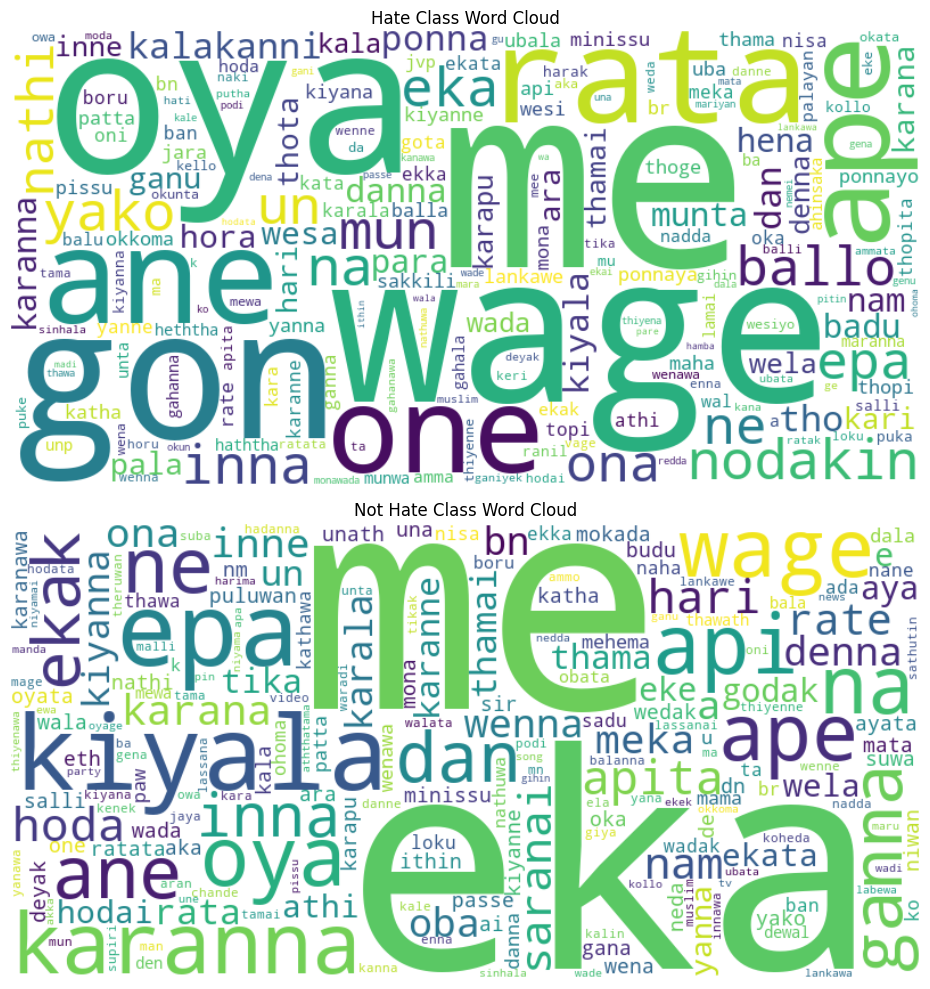

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Split the DataFrame into two subsets based on the 'is_hate' column
hate_df = df[df['is_hate'] == 1]
not_hate_df = df[df['is_hate'] == 0]

# Tokenize and count the words for each class
def get_most_frequent_words(data):
    tokens = ' '.join(data).split()  # Tokenize and join all text in the class
    word_counts = Counter(tokens)
    return word_counts

hate_word_counts = get_most_frequent_words(hate_df['text'])
not_hate_word_counts = get_most_frequent_words(not_hate_df['text'])

# Create Word Clouds for each class
hate_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hate_word_counts)
not_hate_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(not_hate_word_counts)

# Plot the Word Clouds
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.title('Hate Class Word Cloud')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(not_hate_wordcloud, interpolation='bilinear')
plt.title('Not Hate Class Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()
